In [1]:
import pandas as pd
import datetime
import numpy as np
import scipy

# Standard plotly imports
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
%matplotlib inline

# Confirmed COVID-19 cases

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
confirmed_df['Country/Region'].to_csv('countries.csv')

In [4]:
confirmed_spain_df_ = confirmed_df[confirmed_df['Country/Region'] == 'Spain']
confirmed_spain_df_.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
18,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,...,165,222,259,400,500,673,1073,1695,2277,2277


## Spain

In [21]:
confirmed_spain_df = pd.DataFrame(zip(confirmed_spain_df_.columns.to_list()[4:], confirmed_spain_df_.values[0][4:]), columns=['date', 'confirmed'])
confirmed_spain_df['date'] = pd.to_datetime(confirmed_spain_df['date'])
confirmed_spain_df.set_index('date', inplace=True)
confirmed_spain_df.iplot(yTitle='Confirmed infections', xTitle='date', title='Spain')

## Korea

In [20]:
confirmed_korea_df_ = confirmed_df[confirmed_df['Country/Region'] == 'Korea, South']
confirmed_korea_df = pd.DataFrame(zip(confirmed_korea_df_.columns.to_list()[4:], confirmed_korea_df_.values[0][4:]), columns=['date', 'confirmed'])
confirmed_korea_df['date'] = pd.to_datetime(confirmed_korea_df['date'])
confirmed_korea_df.set_index('date', inplace=True)
confirmed_korea_df.iplot(yTitle='Confirmed infections', xTitle='date', title='Korea')

# Models

## COVID-19

In [7]:
reproductive_number = 2
days = np.array(range(0, 21))

In [8]:
infected = reproductive_number ** days
infected_sim_df = pd.DataFrame(zip(days, infected), columns=['days', 'infected'])
infected_sim_df.set_index('days', inplace=True)

In [9]:
infected_sim_df.iplot()

In [10]:
infected_sim_df.iplot(yTitle='Infected people', xTitle='day', title='COVID-19 Spread')

## Seasonal flu

In [11]:
reproductive_number = 1.45
days = np.array(range(0, 50))
infected = reproductive_number ** days
infected_sim_df = pd.DataFrame(zip(days, infected), columns=['days', 'infected'])
infected_sim_df.set_index('days', inplace=True)
infected_sim_df.iplot(yTitle='Infected people', xTitle='day', title='Seasonal flu Spread')

# Parameters estimation from the real data

## Spain

In [57]:
valid_indx = confirmed_spain_df['confirmed'] > 0
confirmed_spain_df_ = confirmed_spain_df[valid_indx]
confirmed_spain_df_['days_delta'] = (confirmed_spain_df_.index - confirmed_spain_df_.index[0]).astype('timedelta64[D]')
x = confirmed_spain_df_['days_delta'].to_list()
y = confirmed_spain_df_['confirmed'].to_list()

B, loga = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
A = (np.exp(1))**loga

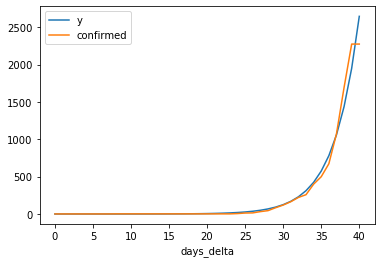

In [58]:
ax = plt.gca()
spain_est = pd.DataFrame(zip(x, A*np.exp(B*np.array(x))), columns=['x', 'y'])
spain_est.plot(kind='line',x='x',y='y',ax=ax)
confirmed_spain_df_.plot(kind='line',x='days_delta',y='confirmed',ax=ax)

## Korea

In [63]:
valid_indx = confirmed_korea_df['confirmed'] > 0
confirmed_korea_df_ = confirmed_korea_df[valid_indx]
confirmed_korea_df_['days_delta'] = (confirmed_korea_df_.index - confirmed_korea_df_.index[0]).astype('timedelta64[D]')
x = confirmed_korea_df_['days_delta'].to_list()
y = confirmed_korea_df_['confirmed'].to_list()

B, loga = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
A = (np.exp(1))**loga
A*np.exp(B*np.array(x))

array([   20.2453602 ,    22.98528079,    26.09601054,    29.62773317,
          33.63742405,    38.18976938,    43.35820969,    49.22612463,
          55.88817813,    63.4518455 ,    72.03914731,    81.78861787,
          92.85754015,   105.4244831 ,   119.69218244,   135.89081129,
         154.28169339,   175.16151894,   198.86713091,   225.78095918,
         256.33719004,   291.02877069,   330.41536173,   375.1323658 ,
         425.90117825,   483.54082497,   548.98117534,   623.27794328,
         707.62971852,   803.39730281,   912.125663  ,  1035.56885514,
        1175.71832177,  1334.83501873,  1515.48588998,  1720.58527869,
        1953.44194284,  2217.81243353,  2517.96169749,  2858.73188109,
        3245.62044613,  3684.86885743,  4183.56327297,  4749.74886112,
        5392.55958897,  6122.36557571,  6950.94038817,  7891.65097747,
        8959.67332077, 10172.23724721, 11548.90439739])

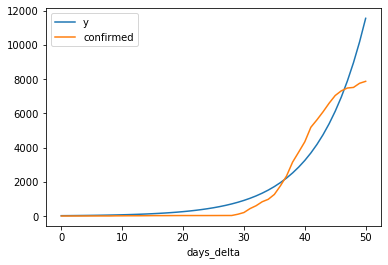

In [62]:
ax = plt.gca()
korea_est = pd.DataFrame(zip(x, A*np.exp(B*np.array(x))), columns=['x', 'y'])
korea_est.plot(kind='line',x='x',y='y',ax=ax)
confirmed_korea_df_.plot(kind='line',x='days_delta',y='confirmed',ax=ax)